# Predicing the Trajectory of a Paper Airplane using Mathematical Modelling
---
### A Physics and Mathematical approach to analysing the trajectory and flight phases of paper airplanes at different initial launch (pitch) angles


This Jupyter Notebook is the main analysis for the project, where we first create a line plot visualisation of the data obtained before creating both a multivariate spline polynomial regression model to predict the trajectory.

Naming convention for raw variable names is *"{variable}{initial launch angle}_{flight number}"* where flight number is an integer from 1-5 referencing the flight that took place for that launch angle. So Horizontal12_2 would indicate the variable containing horizontal displacement data for the second flight recorded for initial launch angle 12.

### Table of Contents:
* [1. Installing Libraries](#1_Installing_Libraries)
* [2. Importing Data and Data Preparation](#2_Importing_Data_and_Data_Preparation)
* [3. Plotting Original Trajectories](#3_Plotting_Original_Trajectories)
* [4. Predictive Modelling](#4_Predictive_Modelling)

# 1_Installing_Libraries

In [2]:
pip install -r requirements.txt

  Using cached numpy-1.26.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached matplotlib-3.8.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached scipy-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pandas-2.2.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached statsmodels-0.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached contourpy-1.2.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (157 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp312-cp31

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import SmoothBivariateSpline

/tmp/ipykernel_1627/2166427321.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2_Importing_Data_and_Data_Preparation

In [2]:
raw_df = pd.read_csv('raw_data.csv')

In [3]:
# Data Preparation: Appends all columns of same variable into one column for predictive modelling

# Vertical data
vertical_data = []

for angle in range(0,42,2): # Getting all angles
    for flight_number in range(1,6,1): # Getting all flight numbers
        try: # Certain angles having missing flight numbers, so certain exceptions are passed
            vertical_data = np.append(vertical_data, raw_df[f"Vertical{angle}_{flight_number}"])
        except:
            pass
        
# Horizontal data
horizontal_data = []

for angle in range(0,42,2): # Getting all angles
    for flight_number in range(1,6,1): # Getting all flight numbers
        try: # Certain angles having missing flight numbers, so certain exceptions are passed
            horizontal_data = np.append(horizontal_data, raw_df[f"Horizontal{angle}_{flight_number}"])
        except:
            pass

# Initial Pitch Angle data
initial_pitch_angle_data = []

for angle in range(0,42,2): # Getting all angles
    for flight_number in range(1,6,1): # Getting all flight numbers
        try: # Certain angles having missing flight numbers, so certain exceptions are passed
            initial_pitch_angle_data = np.append(initial_pitch_angle_data, [angle] * len(raw_df[f"Vertical{angle}_{flight_number}"]))
        except:
            pass

# 3_Plotting_Original_Trajectories

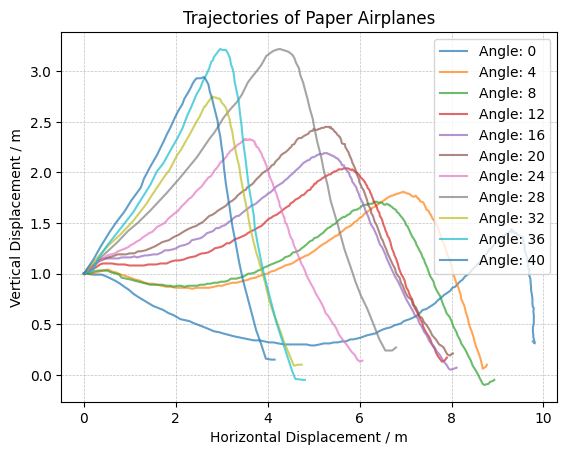

In [4]:
# Plotting scatter plot of trajectories 0-40 with 4 degree intervals

for i in range(0,44,4):
    plt.plot(raw_df[f"Horizontal{i}_1"], raw_df[f"Vertical{i}_1"], alpha=0.7, label=f"Angle: {i}") # Still uses original separated columns instead of concatenated columns

plt.xlabel('Horizontal Displacement / m')
plt.ylabel('Vertical Displacement / m')
plt.title('Trajectories of Paper Airplanes')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.8)  
plt.legend()

plt.show()

# 4_Predictive_Modelling

In [5]:
# Removing rows with missing horizontal or vertical values
valid_indices = ~np.isnan(horizontal_data) # Horizontal data is used as it is a variable that will contain the rows with nan values
horizontal_data = horizontal_data[valid_indices]
vertical_data = vertical_data[valid_indices]
initial_pitch_angle_data = initial_pitch_angle_data[valid_indices]

# Creating a spline regression model
spline_model = SmoothBivariateSpline(horizontal_data, initial_pitch_angle_data, vertical_data)

# Setting a range of values for prediction
horizontal_range = np.linspace(0, np.max(horizontal_data), 200)  
initial_pitch_angle_range = np.linspace(0, 40, 100)
initial_pitch_angle_range_grid, horizontal_range_grid = np.meshgrid(initial_pitch_angle_range, horizontal_range)

# Performing the prediction using spline regression
vertical_range = spline_model.ev(horizontal_range_grid, initial_pitch_angle_range_grid)

# Clipping the predicted values below 0
vertical_range = np.clip(vertical_range, 0, None)

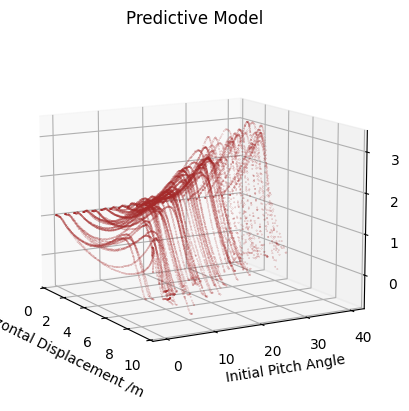

In [6]:
# Creating a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plotting the actual data points
scatter = ax.scatter(horizontal_data, initial_pitch_angle_data, vertical_data, color='brown', alpha=1, s=0.01, label='Actual Data')

# Changing aesthetics
ax.set_xlabel('Horizontal Displacement /m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_zlabel('Height /m')
ax.set_title('Predictive Model')
ax.set_xlim([0,10])
ax.view_init(elev=12, azim=330) # Adjust these values to change angle of observation

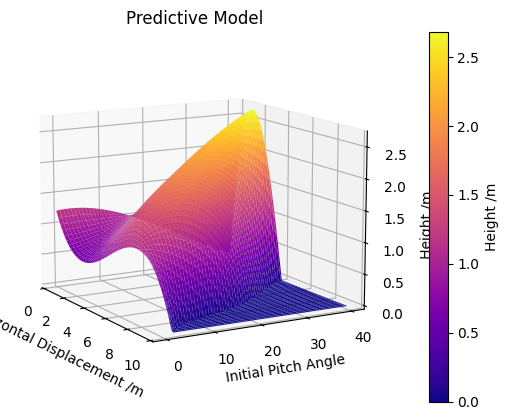

In [7]:
# Creating a 3D plot with gray background
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Plotting the regression surface
surface = ax.plot_surface(horizontal_range_grid, initial_pitch_angle_range_grid, vertical_range, cmap='plasma', alpha=1, label='Regression Surface')

# Changing aesthetics
ax.set_xlabel('Horizontal Displacement /m')
ax.set_ylabel('Initial Pitch Angle')
ax.set_zlabel('Height /m')
ax.set_title('Predictive Model')
ax.set_xlim([0,10])
ax.view_init(elev=12, azim=330) # Adjust these values to change angle of observation

# Create colorbar
cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Height /m')

In [8]:
# Calculating and printing the R-squared
residuals = vertical_data - spline_model.ev(horizontal_data, initial_pitch_angle_data)
total_sum_of_squares = np.sum((vertical_data - np.mean(vertical_data))**2)
residual_sum_of_squares = np.sum(residuals**2)
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
print("R-squared:", r_squared)

R-squared: 0.6403404854703268
